# Patterns of Variation in Feature Spaces
This notebook corresponds to the case study 'Patterns of Variation in Feature Spaces' from the paper.

In [73]:
import model
import dataloader as dl
import numpy as np
import trainer
import parameters as p
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import torch


datasets = ['magic04'] # magic04
model_type = 'hinge_oco'

torch.manual_seed(p.random_state)
np.random.seed(p.random_state)


def experiment(cov_strength):
    p.cov_strength = cov_strength
    print("cov. strength set to " + str(cov_strength))
    # initialize the dicts for collecting results
    results = {}
    masks = {}
    occurrences = {}
    losses = {}
    errors = {}

    for dataset in datasets:
        results[dataset] = {}
        masks[dataset] = {}
        losses[dataset] = {}
        errors[dataset] = {}

        for scenario in p.scenarios:
            results[dataset][scenario] = 0
            masks[dataset][scenario] = []
            losses[dataset][scenario] = []
            errors[dataset][scenario] = []

    # run the experiments
    for scenario in p.scenarios:
        for dataset_name in datasets:
            Xpath, ypath = dl.get_path(dataset_name)
            X, y = dl.read_dataset(Xpath, ypath)
            num_features = len(X[0])
            m = p.models[model_type](num_features, p.learning_rate)
            fold_errors, fold_losses, fold_weights, fold_masks, error_lists = trainer.cross_validation(X, y, m, p.folds, p.scenarios[scenario])
            masks[dataset_name][scenario] = fold_masks
            losses[dataset_name][scenario] = fold_losses
            errors[dataset_name][scenario] = error_lists
            results[dataset_name][scenario] = np.mean(fold_errors)
            print(dataset_name, scenario, model_type, np.mean(fold_errors))
        print()
        
    return results, masks, losses, errors

In [74]:
results, masks, losses, errors = experiment(0.0)

cov. strength set to 0.0
magic04 varying_gaussian hinge_oco 0.4601871812398127

magic04 varying_gaussian +.25 hinge_oco 0.5153504390346496

magic04 varying_gaussian +.50 hinge_oco 0.5423918187076083

magic04 varying_gaussian +.75 hinge_oco 0.559919028340081

magic04 varying_uniform hinge_oco 0.32170724012829277

magic04 full hinge_oco 0.24147694410852308



In [75]:
# accumulating loss
# averages with sterr.

import pandas as pd
import seaborn as sns

data = []

# convert the dictionary of losses to a dataframe
    # columns: Scenario - timepoint - fold - value - dataset
for dataset_name in losses:
    for scenario in losses[dataset_name]:
        for fold in range(len(losses[dataset_name][scenario])):
            # calculate accumulating losses
            acc_loss = []
            acc_sum = 0
            
            for timepoint in range(len(losses[dataset_name][scenario][fold])):
                acc_sum += losses[dataset_name][scenario][fold][timepoint]
                acc_loss.append(acc_sum / float(timepoint + 1))
                
            for timepoint2 in range(len(losses[dataset_name][scenario][fold])):    
                value = acc_loss[timepoint2]
                if timepoint2 % 500 == 0:
                    row = [scenario, timepoint2, fold, dataset_name, value]
                    data.append(row)

df = pd.DataFrame(data, columns=['scenario', 'instance', 'fold', 'dataset', 'acc. loss'])



Text(0.5, 1.0, 'Accumulating Loss on Different Variation Patterns')

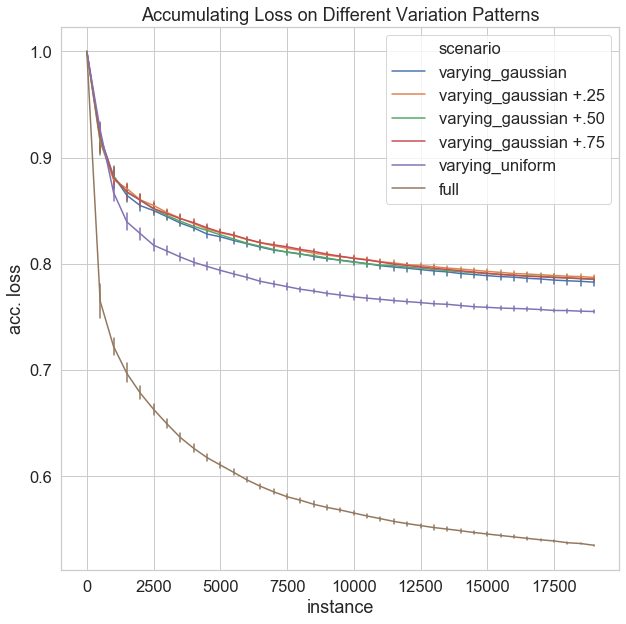

In [76]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.5)  # crazy big
#ax.set(yscale="log")
sns.set_style("whitegrid")
sns.lineplot(
    data=df, x="instance", y="acc. loss", hue="scenario", err_style="bars", ci=95, ax=ax
).set_title('Accumulating Loss on Different Variation Patterns')


In [77]:
# accumulating loss
# averages with sterr.

import pandas as pd
import seaborn as sns

data = []

# convert the dictionary of losses to a dataframe
    # columns: Scenario - timepoint - fold - value - dataset
for dataset_name in errors:
    for scenario in errors[dataset_name]:
        for fold in range(len(errors[dataset_name][scenario])):
            # calculate accumulating losses
            acc_loss = []
            acc_sum = 0
            
            for timepoint in range(len(errors[dataset_name][scenario][fold])):
                acc_sum += errors[dataset_name][scenario][fold][timepoint]
                acc_loss.append(acc_sum / float(timepoint + 1))
                
            for timepoint2 in range(len(errors[dataset_name][scenario][fold])):    
                value = acc_loss[timepoint2]
                if timepoint2 %  500 == 0:
                    row = [scenario, timepoint2, fold, dataset_name, value]
                    data.append(row)

df = pd.DataFrame(data, columns=['scenario', 'instance', 'fold', 'dataset', 'acc. error'])




Text(0.5, 1.0, 'Accumulating Error Rate on Different Variation Patterns')

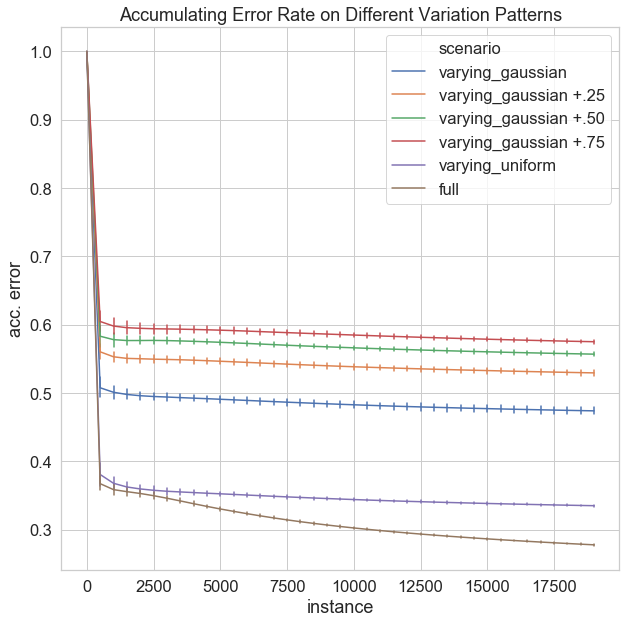

In [78]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.5)  # crazy big
#ax.set(yscale="log")
sns.set_style("whitegrid")

sns.lineplot(
    data=df, x="instance", y="acc. error", hue="scenario", err_style="bars", ci=95, ax=ax
).set_title('Accumulating Error Rate on Different Variation Patterns')

In [153]:
# avg. num. features received per instance for magic04 with 20 fold c.v.
print(np.sum(masks['magic04']['varying_gaussian'])/380400)
print(np.sum(masks['magic04']['varying_gaussian +.25'])/380400)
print(np.sum(masks['magic04']['varying_gaussian +.50'])/380400)
print(np.sum(masks['magic04']['varying_gaussian +.75'])/380400)
print(np.sum(masks['magic04']['varying_uniform'])/380400)
# 19020 * 20 = 380400

4.990862250262881
4.991606203995794
5.004090431125132
5.012823343848581
5.000028916929548


In [154]:
print(np.mean(np.sum(masks['magic04']['varying_gaussian'][0], axis=1)))
print(np.std(np.sum(masks['magic04']['varying_gaussian'][0], axis=1)))

5.01714075398286
3.8871672867838525


In [155]:
print(np.mean(np.sum(masks['magic04']['varying_gaussian +.25'][0], axis=1)))
print(np.std(np.sum(masks['magic04']['varying_gaussian +.25'][0], axis=1)))

5.019927440980073
4.220158779985161


In [157]:
print(np.mean(np.sum(masks['magic04']['varying_gaussian +.50'][0], axis=1)))
print(np.std(np.sum(masks['magic04']['varying_gaussian +.50'][0], axis=1)))

5.011777695988222
4.379935525403683


In [158]:
print(np.mean(np.sum(masks['magic04']['varying_gaussian +.75'][0], axis=1)))
print(np.std(np.sum(masks['magic04']['varying_gaussian +.75'][0], axis=1)))

5.027761711972238
4.544371688660193


In [162]:
print(np.mean(np.sum(masks['magic04']['varying_uniform'][0], axis=1)))
print(np.std(np.sum(masks['magic04']['varying_uniform'][0], axis=1)))

5.002471212997529
1.5893211222343875


Text(0.5, 1, 'Gaussian')

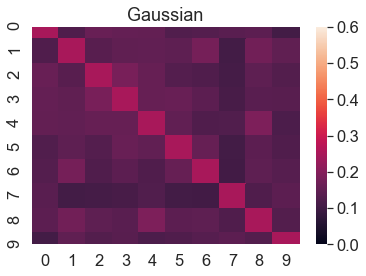

In [144]:
cov_mat = np.cov(masks['magic04']['varying_gaussian'][0].T)
sns.heatmap(cov_mat, vmin=0, vmax=0.6).set_title("Gaussian")

Text(0.5, 1, 'Gaussian +.25')

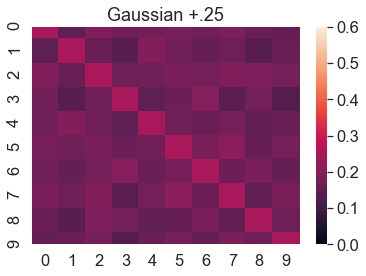

In [145]:
cov_mat = np.cov(masks['magic04']['varying_gaussian +.25'][0].T)
sns.heatmap(cov_mat, vmin=0, vmax=0.6).set_title("Gaussian +.25")

Text(0.5, 1, 'Gaussian +.5')

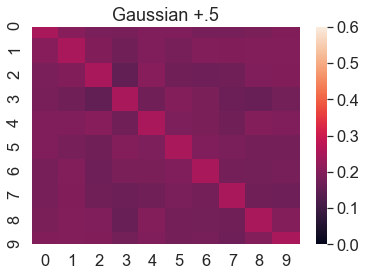

In [146]:
cov_mat = np.cov(masks['magic04']['varying_gaussian +.50'][0].T)
sns.heatmap(cov_mat, vmin=0, vmax=0.6).set_title("Gaussian +.5")

Text(0.5, 1, 'Gaussian +.75')

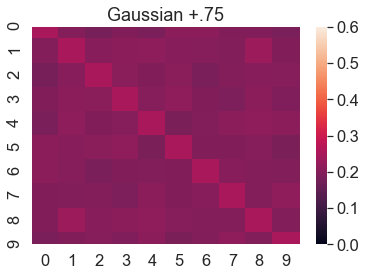

In [147]:
cov_mat = np.cov(masks['magic04']['varying_gaussian +.75'][0].T)
sns.heatmap(cov_mat, vmin=0, vmax=0.6).set_title("Gaussian +.75")

Text(0.5, 1, 'Uniform')

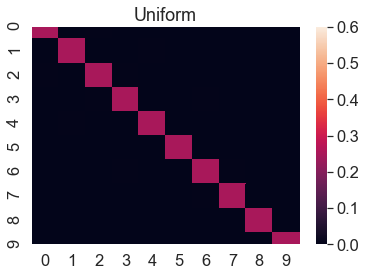

In [148]:
cov_mat = np.cov(masks['magic04']['varying_uniform'][0].T)
sns.heatmap(cov_mat, vmin=0, vmax=0.6).set_title("Uniform")

Text(0.5, 1, 'Full Data')

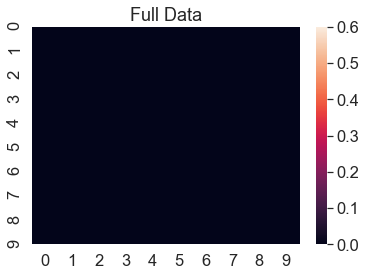

In [149]:
cov_mat = np.zeros(np.cov(masks['magic04']['varying_uniform'][0].T).shape)
sns.heatmap(cov_mat, vmin=0, vmax=0.6).set_title("Full Data")

In [102]:
def simulate_varying(X, cov_strength):  # multivariate normal distribution
    '''Get the data and generate a varying feature space pattern.
    Possible concerns: thresholding messing up the distribution?'''

    # create a covariance matrix
    num_features = len(X[0])
    cov = np.random.rand(num_features, num_features) + cov_strength
    cov = np.dot(cov, cov.transpose())  # to have a positive semi-definite matrix

    # create a mean vector
    #mean = np.random.rand(len(X[0]))
    mean = np.zeros(len(X[0]))

    # sample from multivariate gaussian w/ given mean and cov
    spaces = np.random.multivariate_normal(mean, cov, len(X))

    # threshold samples for 1-hot encoding
    spaces[spaces < 0] = 0
    spaces[spaces != 0] = 1

    return spaces

Xpath, ypath = dl.get_path(dataset_name)
X, y = dl.read_dataset(Xpath, ypath)



In [104]:
num_features = len(X[0])

In [193]:
cov = np.random.rand(num_features, num_features)
cov

array([[0.75585818, 0.71683829, 0.43783977, 0.24395181, 0.25622011,
        0.73263812, 0.15402258, 0.53586748, 0.19283299, 0.4917446 ],
       [0.8115986 , 0.86758605, 0.27868883, 0.39805216, 0.02540124,
        0.02237769, 0.34592117, 0.82897236, 0.25765224, 0.14985803],
       [0.74621611, 0.32639839, 0.74725553, 0.08795141, 0.71220874,
        0.82600392, 0.71613012, 0.60047372, 0.14584083, 0.5581955 ],
       [0.13458522, 0.76914526, 0.12110972, 0.48190642, 0.47959748,
        0.56705922, 0.8484525 , 0.19245413, 0.71423813, 0.13915431],
       [0.60769033, 0.55554919, 0.53073894, 0.20698335, 0.74818378,
        0.78388711, 0.83400603, 0.35953624, 0.46476973, 0.6533754 ],
       [0.25756289, 0.40806152, 0.73985961, 0.03821604, 0.19836413,
        0.58025203, 0.16647681, 0.47391248, 0.0354729 , 0.31453328],
       [0.92265366, 0.19573809, 0.57015142, 0.48447762, 0.05919408,
        0.55630831, 0.52192942, 0.41882204, 0.23081681, 0.73067331],
       [0.48015737, 0.43775175, 0.3897913

In [113]:
cov = np.dot(cov, cov.transpose())

In [164]:
print(np.sum(np.sum(masks['magic04']['full'][0], axis=1)))



190190.0


In [166]:
np.sum(masks['magic04']['full'])

3803800.0

In [188]:
m = np.array(masks['magic04']['varying_gaussian +.75']).reshape(20*19019, 10)
print(np.mean(np.sum(m, axis=1)), np.std(np.sum(m, axis=1)), np.sum(m))

5.013086913086913 4.548281874424541 1906878.0
